In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt
import earthpy

%matplotlib inline

### Escolha de área

,minx,miny,maxx,maxy
0,292583.362379,7.608264e+06,344777.003253,7.637882e+06


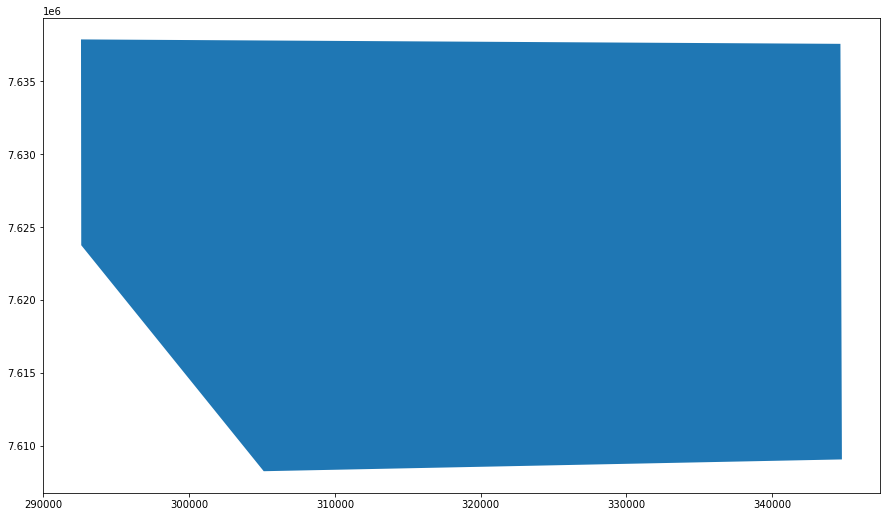

In [2]:
area_test = gpd.read_file('../../../database/vectors/pg_area_teste.shp')
area_test.plot(figsize=(15,15))
area_test.crs
earthpy.epsg['32723']
area_test.bounds

In [3]:
#area_folhaE = gpd.read_file('../../../database/vectors/pg_area_folhaesquerda/area_folhaE.shp')

In [4]:
#area_folhaE.crs
#earthpy.epsg['32723']
#area_folhaE.bounds

In [5]:
gama_1105 = pd.read_csv('../../../database/csv/gama/gama_1105_sraw.csv')

In [6]:
mag_1105 = pd.read_csv('../../../database/csv/mag/mag_1105_sraw.csv')

In [7]:
gama_1105.head()

,KPERC,eU,eTH,UTHRAZAO,X,Y,UKRAZAO,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE
0,1.02,1.11,13.00,0.1,292878.15,7624109.00,0.9,600.12,9.86,23.0,-21.473638,-46.998997
1,1.47,1.09,13.53,0.1,292876.59,7624190.38,0.8,599.47,9.77,24.2,-21.472903,-46.999002
2,1.82,1.15,14.97,0.1,292875.03,7624271.94,0.8,600.63,9.81,25.3,-21.472167,-46.999007
3,1.52,1.22,14.94,0.1,292874.16,7624353.33,0.7,602.72,9.96,25.5,-21.471432,-46.999005
4,1.34,1.15,13.11,0.1,292873.81,7624434.72,0.7,602.21,10.18,24.5,-21.470697,-46.998998


In [8]:
gama_1105['geometry'] = [geometry.Point(x, y) for x, y in zip(gama_1105['X'], gama_1105['Y'])]
crs = "+proj=utm +zone=21 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
gama_1105 = gpd.GeoDataFrame(gama_1105, geometry='geometry', crs=crs)
gama_1105.head(100)

,KPERC,eU,eTH,UTHRAZAO,X,Y,UKRAZAO,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE,geometry
0,1.02,1.11,13.00,0.1,292878.15,7624109.00,0.9,600.12,9.86,23.0,-21.473638,-46.998997,POINT (292878.150 7624109.000)
1,1.47,1.09,13.53,0.1,292876.59,7624190.38,0.8,599.47,9.77,24.2,-21.472903,-46.999002,POINT (292876.590 7624190.380)
2,1.82,1.15,14.97,0.1,292875.03,7624271.94,0.8,600.63,9.81,25.3,-21.472167,-46.999007,POINT (292875.030 7624271.940)
3,1.52,1.22,14.94,0.1,292874.16,7624353.33,0.7,602.72,9.96,25.5,-21.471432,-46.999005,POINT (292874.160 7624353.330)
4,1.34,1.15,13.11,0.1,292873.81,7624434.72,0.7,602.21,10.18,24.5,-21.470697,-46.998998,POINT (292873.810 7624434.720)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.42,1.03,12.71,0.1,292879.56,7631856.82,1.7,596.17,20.09,18.9,-21.403678,-46.998030,POINT (292879.560 7631856.820)
96,0.26,1.03,11.31,0.1,292879.24,7631935.81,1.8,599.09,21.22,18.1,-21.402965,-46.998023,POINT (292879.240 7631935.810)
97,0.31,0.94,11.22,0.1,292878.24,7632014.80,1.9,603.28,22.36,18.5,-21.402252,-46.998023,POINT (292878.240 7632014.800)
98,0.28,0.97,10.40,0.1,292877.23,7632093.78,2.0,606.98,23.35,19.0,-21.401538,-46.998023,POINT (292877.230 7632093.780)


In [9]:
mag_1105['geometry'] = [geometry.Point(x, y) for x, y in zip(mag_1105['X'], mag_1105['Y'])]
crs = "+proj=utm +zone=21 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
mag_1105 = gpd.GeoDataFrame(mag_1105, geometry='geometry', crs=crs)
mag_1105.head(100)

,X,Y,MDT,LATITUDE,LONGITUDE,MAGCOM,MAGCOR,MAGIGRF,MAGMIC,MAGNIV,geometry
0,292879.66,7624043.90,609.44,-21.474226,-46.998990,23154.640,23123.693,49.882,23113.580,23119.835,POINT (292879.660 7624043.900)
1,292879.49,7624052.04,609.53,-21.474153,-46.998991,23155.182,23124.236,50.469,23114.171,23120.439,POINT (292879.490 7624052.040)
2,292879.32,7624060.18,609.60,-21.474079,-46.998991,23155.734,23124.789,50.987,23114.677,23120.958,POINT (292879.320 7624060.180)
3,292879.15,7624068.32,609.66,-21.474006,-46.998992,23156.180,23125.236,51.473,23115.181,23121.473,POINT (292879.150 7624068.320)
4,292878.98,7624076.47,609.71,-21.473932,-46.998993,23156.659,23125.715,51.945,23115.658,23121.963,POINT (292878.980 7624076.470)
...,...,...,...,...,...,...,...,...,...,...,...
95,292875.91,7624816.99,602.45,-21.467245,-46.998931,23067.344,23036.446,-38.866,23025.277,23032.544,POINT (292875.910 7624816.990)
96,292876.05,7624825.15,602.33,-21.467172,-46.998929,23066.365,23035.468,-39.895,23024.253,23031.524,POINT (292876.050 7624825.150)
97,292876.18,7624833.31,602.22,-21.467098,-46.998926,23065.414,23034.517,-40.851,23023.303,23030.577,POINT (292876.180 7624833.310)
98,292876.32,7624841.47,602.12,-21.467024,-46.998924,23064.628,23033.731,-41.762,23022.396,23029.676,POINT (292876.320 7624841.470)


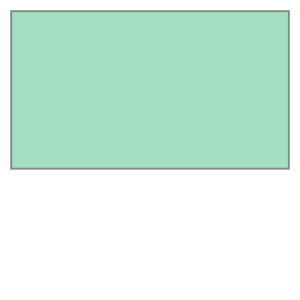

In [14]:
bounds = geometry.Polygon([(292583.362379, 7.637882e+06), (344777.003253, 7.637882e+06), 
                           (344777.003253, 7.608264e+06), (292583.362379, 7.608264e+06)])
area = bounds.area
bounds

In [15]:

cond1 = mag_1105.intersects(bounds)
mag_atest = mag_1105[cond1]
cond2 = gama_1105.intersects(bounds)
gama_atest = gama_1105[cond2]

In [16]:
gama_atest.shape

(36630, 13)

In [17]:
mag_atest.shape

(368947, 11)

In [ ]:
#gama_folhaE.to_csv('../../../database/csv/gama/gama_folhaE.csv')
#mag_folhaE.to_csv('../../../database/csv/mag/mag_folhaE.csv')

In [ ]:
gama_atest.to_csv('../../../database/csv/gama/gamaraw_atest.csv')
mag_atest.to_csv('../../../database/csv/mag/magraw_atest.csv')